### Veri Kümesi Hakkında
### İçerik

Analiz için DataCo Global şirketi tarafından kullanılan Tedarik Zincirleri Veri Seti kullanıldı. Makine Öğrenimi Algoritmalarının ve R Yazılımının kullanımına olanak sağlayan Tedarik Zinciri Veri Seti.
Önemli kayıtlı faaliyet alanları: Tedarik, Üretim, Satış, Ticari Dağıtım. Ayrıca bilgi üretimi için Yapılandırılmış Verilerin Yapılandırılmamış Verilerle ilişkilendirilmesine de olanak tanır.

Veri Türü :
Yapılandırılmış Veri : DataCoSupplyChainDataset.csv
Yapılandırılmamış Veri : tokenized_access_logs.csv (Clickstream)

Ürün Türleri: Giyim, Spor ve Elektronik Malzemeler

In [218]:
# Gerekli kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, recall_score, f1_score
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve
from warnings import filterwarnings
filterwarnings('ignore')

In [219]:
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [220]:
# Eksik değerlere bakma
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [221]:
# DataFrame'den belirtilen sütunları çıkarma
df = df.drop(['Customer Email'
, 'Customer Fname'
, 'Customer Lname'
,'Product Status'
,'Customer Password'
,'Customer Street'
,'Customer Fname'
,'Customer Lname'
,'Latitude'
,'Longitude'
,'Product Description'
,'Product Image'
,'Order Zipcode'
,'shipping date (DateOrders)'], axis=1)

In [222]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,Standard Class


In [223]:
# 'order date (DateOrders)' adlı sütundaki tarih/saat bilgisini içeren değerleri, pandas kütüphanesinin to_datetime() fonksiyonuyla datetime veri türüne dönüştürme
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['order date (DateOrders)']

0        2018-01-31 22:56:00
1        2018-01-13 12:27:00
2        2018-01-13 12:06:00
3        2018-01-13 11:45:00
4        2018-01-13 11:24:00
                 ...        
180514   2016-01-16 03:40:00
180515   2016-01-16 01:34:00
180516   2016-01-15 21:00:00
180517   2016-01-15 20:18:00
180518   2016-01-15 18:54:00
Name: order date (DateOrders), Length: 180519, dtype: datetime64[ns]

In [224]:
# order date (DateOrders)' adlı sütundaki tarih/saat bilgisini ayrıştırarak yeni sütunlar oluşturma
df['order_yr']= pd.DatetimeIndex(df['order date (DateOrders)']).year
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
df['order_day'] = pd.DatetimeIndex(df['order date (DateOrders)']).weekday
df['order_hour'] = pd.DatetimeIndex(df['order date (DateOrders)']).hour

In [225]:
# Sütunu ayrıştırıldığı ve artık gerekli olmadığı için çıkarılır.
df = df.drop(['order date (DateOrders)'], axis=1)

In [226]:
# 'Customer Zipcode' adlı sütundaki eksik değerleri 0 ile doldurma
df['Customer Zipcode'] = df['Customer Zipcode'].fillna(0)

In [227]:
# 'late_days' adında yeni bir sütun oluşturma ve bu sütuna 'Days for shipping (real)' sütunundaki değerler ile 'Days for shipment (scheduled)' sütunundaki değerler arasındaki farkı hesaplama
df['late_days'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']
df['late_days']

0        -1
1         1
2         0
3        -1
4        -2
         ..
180514    0
180515    1
180516    1
180517   -1
180518    0
Name: late_days, Length: 180519, dtype: int64

In [228]:
# Değişken seçimi ve kodlama için gereken sütunları belirleme
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Shipping Mode', 'order_yr',
       'order_month', 'order_day', 'order_hour', 'late_days'],
      dtype='object')

In [229]:
# Mevcut DataFrame'in bir kopyasını alma ve 'train_df' adında yeni bir DataFrame'e kopyalama
train_df = df.copy()
train_df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Id                        int64
Customer Segment                  object
Customer State                    object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Disco

In [230]:
# Kategorik değişkenleri sayısal değerlere dönüştürme
label_encoder = LabelEncoder()
columns_to_encode = ['Type'
 , 'Category Name'
 , 'Customer City'
 , 'Customer Country'
 , 'Customer Segment'
 , 'Customer State'
 ,'Delivery Status'
 , 'Department Name'
 , 'Market'
 , 'Order City'
 , 'Order Country'
 , 'Order Region'
 , 'Order State'
 , 'Order Status'
 , 'Product Name'
 , 'Shipping Mode']
for column in columns_to_encode:
    train_df[column] = label_encoder.fit_transform(train_df[column])

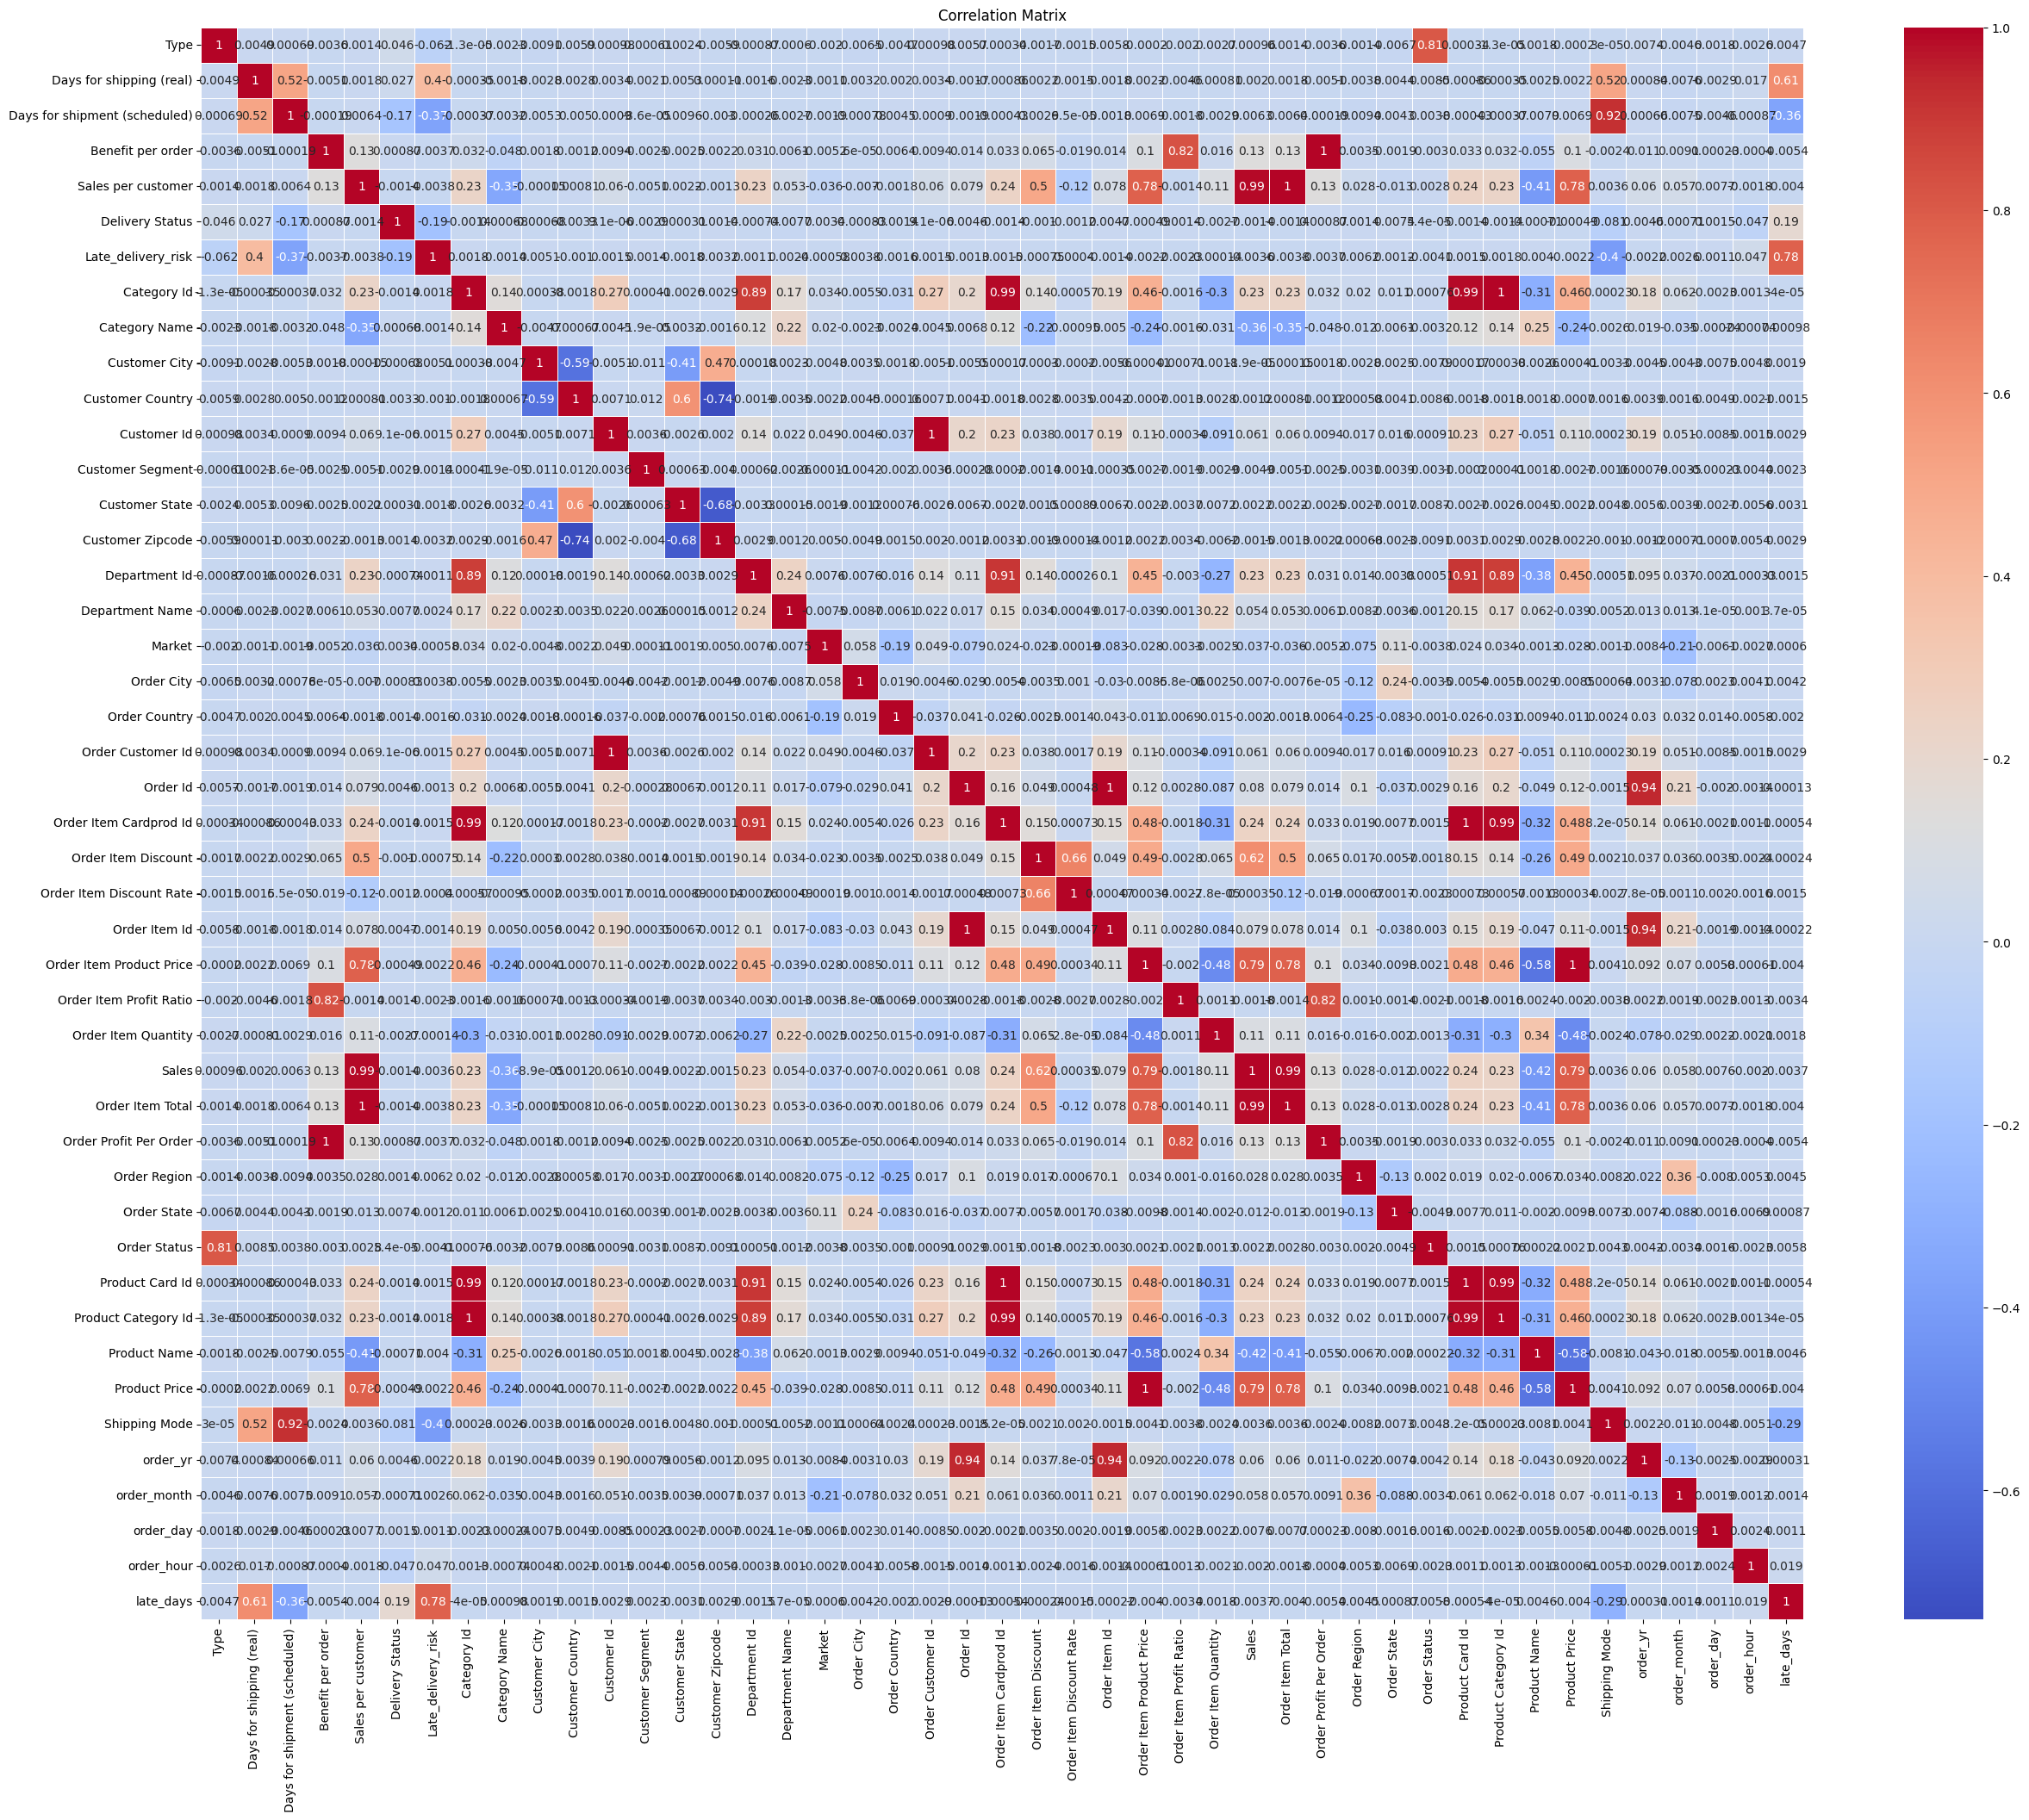

In [231]:
# Correlation Matrix
correlation_matrix = train_df.corr()
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [232]:
# "Days for shipping (real)", "Days for shipment (scheduled)", "Delivery Status" ve "late_days" sütunlarını kaldırarak tahmincileri ve sonucu seçme
# "Days for shipping (real)" ve "Days for shipment (scheduled)" sütunları, artık "late_days" sütunu oluşturulduğu için gerekli olmadığı ve "Delivery Status" sütunu ise bağımlı değişken olduğu için çıkarılır
train_df.drop(["Days for shipping (real)", "Days for shipment (scheduled)", "Delivery Status", "late_days"], axis=1, inplace=True)

In [233]:
# Random Forest sınıflandırıcısını kullanarak özellik seçimi için bir yöntem uygulama
rf = RandomForestClassifier(n_estimators=45, random_state=42)

# Sınıflandırıcıyı verilere uyumlu hale getirme
X = train_df.drop(columns=['Late_delivery_risk'])
y = train_df['Late_delivery_risk']
rf.fit(X, y)

# özellik önem skorları kullanılarak en iyi özelliklerin seçilmesi
num_features_to_select = 5
selector = SelectFromModel(rf, max_features=num_features_to_select)
selector.fit(X, y)

# Seçilen özellik indekslerini ve özellik adlarını alma
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

# Yalnızca en iyi özellikleri seçme
X_new = X[selected_feature_names]
X_new.columns

Index(['Customer Id', 'Order City', 'Order Customer Id', 'Order Status',
       'Shipping Mode'],
      dtype='object')

In [234]:
# Özellikleri predictors olarak hedef değişkenini outcome olarak belirleme
predictors = X_new
outcome = y

#  Verileri eğitim ve doğrulama için ayırmak üzere train_test_split fonksiyonunu kullanma
train_X, valid_X, train_y, valid_y = train_test_split(predictors, outcome, test_size=0.4, random_state=0)

In [235]:
# XGBClassifier sınıfını kullanarak bir XGBoost sınıflandırıcı oluşturma ve ardından fit() yöntemini kullanarak eğitim verilerini modele uygun hale getirme
from xgboost import XGBClassifier

clf = XGBClassifier()

clf.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [236]:
# Eğitim performansı
classification_report(train_y, clf.predict(train_X))

# Doğrulama performansı
classification_report(valid_y, clf.predict(valid_X))

'              precision    recall  f1-score   support\n\n           0       0.66      0.86      0.74     32718\n           1       0.84      0.63      0.72     39490\n\n    accuracy                           0.73     72208\n   macro avg       0.75      0.74      0.73     72208\nweighted avg       0.76      0.73      0.73     72208\n'

In [237]:
# Eğitim seti üzerine tahmin yapma
predictions = clf.predict(train_X)

# Recall hesaplama
recall = recall_score(train_y, predictions)

# F1-Score hesaplama
f1 = f1_score(train_y, predictions)

# ROC AUC hesaplama
roc_auc = roc_auc_score(train_y, clf.predict_proba(train_X)[:, 1])

# Sonuçları görme
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)

Recall: 0.6561601694487871
F1-Score: 0.7469858766792972
ROC AUC: 0.8563842184447301


In [238]:
# Doğrulama seti üzerine tahmin yapma
predictions = clf.predict(valid_X)

# Recall hesaplama
recall = recall_score(valid_y, predictions)

# F1-Score hesaplama
f1 = f1_score(valid_y, predictions)

# ROC AUC hesaplama
roc_auc = roc_auc_score(valid_y, clf.predict_proba(valid_X)[:, 1])

# Sonuçları görme
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)

Recall: 0.6327677893137503
F1-Score: 0.7225306500115661
ROC AUC: 0.8221029132968052


### Eğitim seti ve doğrulama seti performansları birbirine oldukça yakın olduğu için overfitting yoktur.